<a href="https://colab.research.google.com/github/Anusarakh/DPDM2021/blob/main/Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import data

In [1]:
import pandas as pd


In [2]:
from google.colab import drive # เชื่อม google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

## ทำการ Visualization  ปริมาณคนตาย จากไวรัสโควิด 19 ในเกาหลีใต้

In [4]:
path = '/content/drive/My Drive/DPDM2021_DATA/Project/Covid-19_in_SouthKorea' # เรียกข้อมูลจาก Drive 
Patient = pd.read_csv(os.path.join(path,'PatientInfo.csv')) # ชื่อไฟล์ข้อมูล PatientInfo.csv
Patient  # เรียกดูตาราง

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


## ตรวจสอบค่า mising จากตาราง PatientInfo

In [5]:
Patient.isnull().any()

patient_id            False
sex                    True
age                    True
country               False
province              False
city                   True
infection_case         True
infected_by            True
contact_number         True
symptom_onset_date     True
confirmed_date         True
released_date          True
deceased_date          True
state                 False
dtype: bool

## แทนค่า missing ในตัวแปรที่สนใจ

In [6]:
Patient[['sex']].dropna().mode().iloc[0,0] # แทนค่า missing ด้วยค่า mode

'female'

In [7]:
Patient[['sex']] = Patient[['sex']].fillna(Patient[['sex']].dropna().mode().iloc[0,0])  # แทนค่า missing ด้วยค่า mod  เนื่องจากข้อมูลเชิงคุณภาพ

In [8]:
Patient[['age']].dropna().mode().iloc[0,0]

'20s'

In [9]:
Patient[['age']] = Patient[['age']].fillna(Patient[['age']].dropna().mode().iloc[0,0])  # แทนค่า missing ด้วยค่า mod  เนื่องจากข้อมูลเชิงคุณภาพ

In [10]:
Patient[['city']].dropna().mode().iloc[0,0]

'Gyeongsan-si'

In [11]:
Patient[['city']] = Patient[['city']].fillna(Patient[['city']].dropna().mode().iloc[0,0])  # แทนค่า missing ด้วยค่า mod  เนื่องจากข้อมูลเชิงคุณภาพ

In [12]:
Patient[['infection_case']].dropna().mode().iloc[0,0]

'contact with patient'

In [13]:
Patient[['infection_case']] = Patient[['infection_case']].fillna(Patient[['infection_case']].dropna().mode().iloc[0,0])  # แทนค่า missing ด้วยค่า mod  เนื่องจากข้อมูลเชิงคุณภาพ

In [14]:
Patient

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,female,20s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,female,20s,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,female,20s,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [15]:
Patient.isnull().any()

patient_id            False
sex                   False
age                   False
country               False
province              False
city                  False
infection_case        False
infected_by            True
contact_number         True
symptom_onset_date     True
confirmed_date         True
released_date          True
deceased_date          True
state                 False
dtype: bool

### ตรวจสอบจำนวนข้อมูล 

In [16]:
Patient.shape

(5165, 14)

## ตรวจสอบค่า ในคอลัมล์  deceased_date

In [17]:
(set(Patient['deceased_date']))

{'2020-02-19',
 '2020-02-21',
 '2020-02-23',
 '2020-02-24',
 '2020-02-25',
 '2020-02-26',
 '2020-02-27',
 '2020-03-01',
 '2020-03-02',
 '2020-03-03',
 '2020-03-04',
 '2020-03-05',
 '2020-03-06',
 '2020-03-07',
 '2020-03-08',
 '2020-03-09',
 '2020-03-11',
 '2020-03-16',
 '2020-03-18',
 '2020-03-20',
 '2020-03-22',
 '2020-03-24',
 '2020-03-25',
 '2020-03-26',
 '2020-03-27',
 '2020-03-29',
 '2020-03-31',
 '2020-04-02',
 '2020-04-03',
 '2020-04-05',
 '2020-04-06',
 '2020-04-08',
 '2020-04-09',
 '2020-04-11',
 '2020-04-18',
 '2020-04-22',
 '2020-05-02',
 '2020-05-11',
 '2020-05-25',
 nan}

## Vizualization  จำนวนผูเสียชีวิตของผู้ติดเชื้อโควิด 19 ในประเทศเกาหลีใต้ จำแนกดังนี้
1.กลุ่มอายุ

2.เพศ

3.สาเหตุหารติดเชื้อ

4.เมือง

### ทำการเลือกคอลัมล์ที่สนใจ มาทำการ Vizualization

In [18]:
Patient_data = Patient[['patient_id','sex','age','city','infection_case','deceased_date']] # ชี้ตาราง เพื่อเลือกข้อมูลที่สนใจ
Patient_data # ตารางที่ยังไม่แนค่า 0 และ 1 ใน จำนวนผู้เสียชีวต (คอลัมล์ deceased_date)

,patient_id,sex,age,city,infection_case,deceased_date
0,1000000001,male,50s,Gangseo-gu,overseas inflow,NaN
1,1000000002,male,30s,Jungnang-gu,overseas inflow,NaN
2,1000000003,male,50s,Jongno-gu,contact with patient,NaN
3,1000000004,male,20s,Mapo-gu,overseas inflow,NaN
4,1000000005,female,20s,Seongbuk-gu,contact with patient,NaN
...,...,...,...,...,...,...
5160,7000000015,female,30s,Jeju-do,overseas inflow,NaN
5161,7000000016,female,20s,Jeju-do,overseas inflow,NaN
5162,7000000017,female,20s,Jeju-do,overseas inflow,NaN
5163,7000000018,female,20s,Jeju-do,overseas inflow,NaN


In [19]:
Patient_data.isnull().any()

patient_id        False
sex               False
age               False
city              False
infection_case    False
deceased_date      True
dtype: bool

In [20]:
Patient_data

,patient_id,sex,age,city,infection_case,deceased_date
0,1000000001,male,50s,Gangseo-gu,overseas inflow,NaN
1,1000000002,male,30s,Jungnang-gu,overseas inflow,NaN
2,1000000003,male,50s,Jongno-gu,contact with patient,NaN
3,1000000004,male,20s,Mapo-gu,overseas inflow,NaN
4,1000000005,female,20s,Seongbuk-gu,contact with patient,NaN
...,...,...,...,...,...,...
5160,7000000015,female,30s,Jeju-do,overseas inflow,NaN
5161,7000000016,female,20s,Jeju-do,overseas inflow,NaN
5162,7000000017,female,20s,Jeju-do,overseas inflow,NaN
5163,7000000018,female,20s,Jeju-do,overseas inflow,NaN


### แทนความหมาย การเสียชีวิตและไม่เสียชีวิต ใน คอลัมล์ deceased_date

* 0 = ไม่เสียชีวิต แทนใน NaN

* 1 = เสียชีวิต แทนในค่า date หรือ row ที่แสดงวันที่ 

In [21]:
Patient_data['deceased_date'] = Patient_data['deceased_date'].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
Patient_data

,patient_id,sex,age,city,infection_case,deceased_date
0,1000000001,male,50s,Gangseo-gu,overseas inflow,0
1,1000000002,male,30s,Jungnang-gu,overseas inflow,0
2,1000000003,male,50s,Jongno-gu,contact with patient,0
3,1000000004,male,20s,Mapo-gu,overseas inflow,0
4,1000000005,female,20s,Seongbuk-gu,contact with patient,0
...,...,...,...,...,...,...
5160,7000000015,female,30s,Jeju-do,overseas inflow,0
5161,7000000016,female,20s,Jeju-do,overseas inflow,0
5162,7000000017,female,20s,Jeju-do,overseas inflow,0
5163,7000000018,female,20s,Jeju-do,overseas inflow,0


In [23]:
set(Patient_data['deceased_date'])

{0,
 '2020-02-19',
 '2020-02-21',
 '2020-02-23',
 '2020-02-24',
 '2020-02-25',
 '2020-02-26',
 '2020-02-27',
 '2020-03-01',
 '2020-03-02',
 '2020-03-03',
 '2020-03-04',
 '2020-03-05',
 '2020-03-06',
 '2020-03-07',
 '2020-03-08',
 '2020-03-09',
 '2020-03-11',
 '2020-03-16',
 '2020-03-18',
 '2020-03-20',
 '2020-03-22',
 '2020-03-24',
 '2020-03-25',
 '2020-03-26',
 '2020-03-27',
 '2020-03-29',
 '2020-03-31',
 '2020-04-02',
 '2020-04-03',
 '2020-04-05',
 '2020-04-06',
 '2020-04-08',
 '2020-04-09',
 '2020-04-11',
 '2020-04-18',
 '2020-04-22',
 '2020-05-02',
 '2020-05-11',
 '2020-05-25'}

In [24]:
dw_mapping={'2020-02-19':1, '2020-02-21':1, '2020-02-23':1, '2020-02-24':1, '2020-02-25':1, '2020-02-26':1, '2020-02-27':1, '2020-03-01':1, '2020-03-02':1
            ,'2020-03-03':1, '2020-03-04':1,'2020-03-05':1,'2020-03-06':1,'2020-03-07':1,'2020-03-08':1,'2020-03-09':1,'2020-03-11':1
            ,'2020-03-16':1,'2020-03-18':1,'2020-03-20':1,'2020-03-22':1,'2020-03-24':1,'2020-03-25':1,'2020-03-26':1,'2020-03-27':1,'2020-03-29':1
            ,'2020-03-31':1,'2020-04-02':1,'2020-04-03':1,'2020-04-05':1,'2020-04-06':1,'2020-04-08':1,'2020-04-09':1,'2020-04-11':1,'2020-04-18':1,'2020-04-22':1
            ,'2020-05-02':1,'2020-05-11':1,'2020-05-25':1}

In [25]:
Patient_data['deceased_date']=Patient_data['deceased_date'].map(dw_mapping)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


แทนค่า 0 ในเพศชาย  และ 1 ในเพศหญิง

In [91]:
dw_mapping={'male':0, 'female':1}
Patient_data['sex']=Patient_data['sex'].map(dw_mapping)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [92]:
Patient_data

,patient_id,sex,age,city,infection_case,deceased_date
0,1000000001,NaN,50s,Gangseo-gu,overseas inflow,0.0
1,1000000002,NaN,30s,Jungnang-gu,overseas inflow,0.0
2,1000000003,NaN,50s,Jongno-gu,contact with patient,0.0
3,1000000004,NaN,20s,Mapo-gu,overseas inflow,0.0
4,1000000005,NaN,20s,Seongbuk-gu,contact with patient,0.0
...,...,...,...,...,...,...
5160,7000000015,NaN,30s,Jeju-do,overseas inflow,0.0
5161,7000000016,NaN,20s,Jeju-do,overseas inflow,0.0
5162,7000000017,NaN,20s,Jeju-do,overseas inflow,0.0
5163,7000000018,NaN,20s,Jeju-do,overseas inflow,0.0


In [93]:
Patient_data['deceased_date'] = Patient_data['deceased_date'].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [94]:
Patient_data

,patient_id,sex,age,city,infection_case,deceased_date
0,1000000001,NaN,50s,Gangseo-gu,overseas inflow,0.0
1,1000000002,NaN,30s,Jungnang-gu,overseas inflow,0.0
2,1000000003,NaN,50s,Jongno-gu,contact with patient,0.0
3,1000000004,NaN,20s,Mapo-gu,overseas inflow,0.0
4,1000000005,NaN,20s,Seongbuk-gu,contact with patient,0.0
...,...,...,...,...,...,...
5160,7000000015,NaN,30s,Jeju-do,overseas inflow,0.0
5161,7000000016,NaN,20s,Jeju-do,overseas inflow,0.0
5162,7000000017,NaN,20s,Jeju-do,overseas inflow,0.0
5163,7000000018,NaN,20s,Jeju-do,overseas inflow,0.0


In [95]:
set(Patient_data['deceased_date'])

{0.0, 1.0}

### จำนวนผู้ติดเชื้อทั้งหมด

In [96]:
Patient_data.shape

(5165, 6)

### จำนวนการเสียชีวีดและไม่เสียชีวิตของผู้ติดเชื้อ



0 = ไม่เสียชีวิต จำนวน 5099 ราย

1 = เสียชีวิต จำนวน 66 ราย

In [97]:
Patient_data_Total = Patient_data.groupby('deceased_date').count()
Patient_data_Total

,patient_id,sex,age,city,infection_case
deceased_date,,,,,
0.0,5099,0,5099,5099,5099
1.0,66,0,66,66,66


### เลือกผู้ที่เสียชีวิดจาก colum  deceased_date = 1.0

In [98]:
deceased = Patient_data[Patient_data['deceased_date']==1.0] #เลือกเฉพาะผู้ติดเชื้อโควิด ที่เสียชีวิต
deceased

,patient_id,sex,age,city,infection_case,deceased_date
1468,1200000038,NaN,50s,Nam-gu,contact with patient,1.0
1507,1200000114,NaN,70s,Gyeongsan-si,Shincheonji Church,1.0
1508,1200000620,NaN,70s,Gyeongsan-si,contact with patient,1.0
1509,1200000901,NaN,80s,Gyeongsan-si,contact with patient,1.0
1510,1200001064,NaN,70s,Gyeongsan-si,contact with patient,1.0
...,...,...,...,...,...,...
4902,6020100104,NaN,60s,Cheongdo-gun,Cheongdo Daenam Hospital,1.0
4903,6020100107,NaN,60s,Cheongdo-gun,Cheongdo Daenam Hospital,1.0
4904,6020100205,NaN,50s,Cheongdo-gun,Cheongdo Daenam Hospital,1.0
4905,6020100286,NaN,60s,Cheongdo-gun,Cheongdo Daenam Hospital,1.0


In [99]:
set(Patient_data['infection_case'])

{'Anyang Gunpo Pastors Group',
 'Biblical Language study meeting',
 'Bonghwa Pureun Nursing Home',
 'Changnyeong Coin Karaoke',
 'Cheongdo Daenam Hospital',
 'Coupang Logistics Center',
 'Daejeon door-to-door sales',
 'Daezayeon Korea',
 'Day Care Center',
 'Dongan Church',
 'Dunsan Electronics Town',
 "Eunpyeong St. Mary's Hospital",
 'Gangnam Dongin Church',
 'Gangnam Yeoksam-dong gathering',
 'Geochang Church',
 'Geumcheon-gu rice milling machine manufacture',
 'Guri Collective Infection',
 'Guro-gu Call Center',
 'Gyeongsan Cham Joeun Community Center',
 'Gyeongsan Jeil Silver Town',
 'Gyeongsan Seorin Nursing Home',
 'Itaewon Clubs',
 'KB Life Insurance',
 'Korea Campus Crusade of Christ',
 'Milal Shelter',
 'Ministry of Oceans and Fisheries',
 'Onchun Church',
 'Orange Life',
 'Orange Town',
 'Pilgrimage to Israel',
 'Richway',
 'River of Grace Community Church',
 'SMR Newly Planted Churches Group',
 'Samsung Fire & Marine Insurance',
 'Samsung Medical Center',
 'Seocho Family',


### จำนวนผู้ที่เสียชีวิต

In [100]:
deceased.shape

(66, 6)

### จำนวนผู้เสียชีวิต จำแนกตามอายุของผู้ติดเชื้อโควิด

In [101]:
deceased_age = deceased.groupby('age').count().sort_values(by=['deceased_date'],ascending=False).reset_index() # groupby กลุ่มอายุ
deceased_age = deceased_age[['age','deceased_date']]
deceased_age

,age,deceased_date
0,80s,22
1,70s,19
2,60s,11
3,50s,7
4,90s,6
5,30s,1


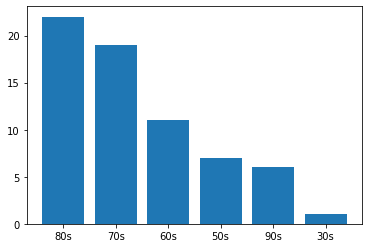

In [102]:
import numpy as np
import matplotlib.pyplot as plt

age = np.array(deceased_age['age'])
deceased_date = np.array(deceased_age['deceased_date'])

plt.bar(age,deceased_date)
plt.show()

### กลุ่มอายุที่มีผู้เสียชีวิตมากที่สุด  คือ 80 ปีขึ้นไป รองลงมา คือ 70-79 ปี 

### จำนวนผู้เสียชีวิต จำแนกตามเพศของผู้ติดเชื้อโควิด

In [103]:
deceased_sex = deceased.groupby('sex').count().sort_values(by=['deceased_date'],ascending=False).reset_index() # groupby กลุ่มอายุ
deceased_sex = deceased_sex[['sex','deceased_date']]
deceased_sex

,sex,deceased_date


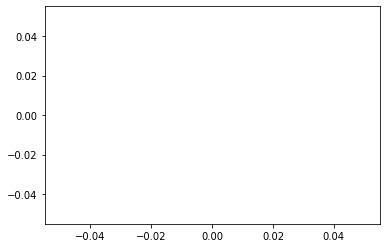

In [104]:
import numpy as np
import matplotlib.pyplot as plt

sex = np.array(deceased_sex['sex'])
deceased_date = np.array(deceased_sex['deceased_date'])

plt.bar(sex,deceased_date , color='green')
plt.show()

### ผู้ชายที่ติดเชื้อมีจำนวนผู้เสียชีวิตมากกว่า ผู้หญิงที่ติดเชื้อ

### จำนวนผู้เสียชีวิต จำแนกตามสาเหตุการติดเชื้อ

In [105]:
deceased_Infec = deceased.groupby('infection_case').count().sort_values(by=['deceased_date'],ascending=False).reset_index() 
deceased_Infec = deceased_Infec[['infection_case','deceased_date']]
deceased_Infec

,infection_case,deceased_date
0,contact with patient,43
1,etc,12
2,Cheongdo Daenam Hospital,7
3,Shincheonji Church,2
4,Bonghwa Pureun Nursing Home,1
5,Gyeongsan Jeil Silver Town,1


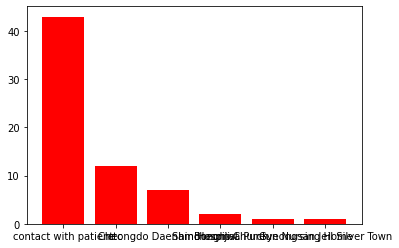

In [106]:
infection = np.array(deceased_Infec['infection_case'])
deceased_date = np.array(deceased_Infec['deceased_date'])

plt.bar(infection,deceased_date , color='red')
plt.show()

#### ส่วนใหญ่จะมีสาเหตุของงการติดเชื้อ มาจาก ใกล้ชิดหรือสัมผัสกับผู้ติดเชื้อ

### จำนวนผู้เสียชีวิต จำแนกตามเมืองของผู้ติดเชื้อโควิด

In [107]:
deceased_city = deceased.groupby('city').count().sort_values(by=['deceased_date'],ascending=False).reset_index() 
deceased_city = deceased_city[['city','deceased_date']]
deceased_city

,city,deceased_date
0,Gyeongsan-si,47
1,Cheongdo-gun,7
2,Cheorwon-gun,2
3,Nam-gu,2
4,Yeongcheon-si,2
5,Bonghwa-gun,1
6,Namyangju-si,1
7,Seo-gu,1
8,Seongju-gun,1
9,Taebaek-si,1


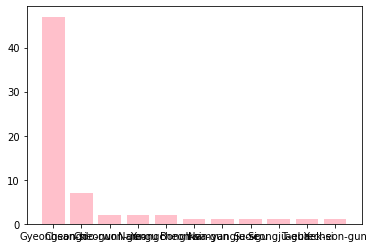

In [108]:
city = np.array(deceased_city['city'])
deceased_date = np.array(deceased_city['deceased_date'])

plt.bar(city,deceased_date , color='pink')
plt.show()

#### เมืองที่มีผู้เสียชีวิตมากที่สุด คือ  Gyeongsan-si

# Data Mining

## Classification

In [109]:
X = np.array(Patient_data[['sex','age','city','infection_case']])
Y = np.array(Patient_data['deceased_date'])

### Split data

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=6)
X_traintrain, X_val, y_traintrain, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=6)

### import

In [111]:

from sklearn.tree import DecisionTreeClassifier

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

define train model 1

In [115]:
mytree = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=4)

define train model 2

In [116]:
mytree2 = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=5)

define train model 3

In [117]:
mytree3 = DecisionTreeClassifier(criterion='entropy',max_depth=7)

define train model 4

In [119]:
mytree4 = DecisionTreeClassifier()

## train

### KNN 


### Define-Train Model1

In [113]:
from sklearn.neighbors import KNeighborsClassifier

In [114]:
neigh1 = KNeighborsClassifier(n_neighbors=1) #เชื่อใกล้สุดแค่คนเดียว
neigh1.fit(X_traintrain,y_traintrain)

ValueError: ignored

### Define-Train Model2

In [89]:
neigh2 = KNeighborsClassifier(n_neighbors=9,weights='distance') #เชื่อคนใกล้มากว่าคนไกล
neigh2.fit(X_traintrain,y_traintrain)

ValueError: ignored

### Define-Train Model3

In [90]:
neigh3 = KNeighborsClassifier(n_neighbors=11,weights='distance') #เชื่อทุกคนเท่ากัน
neigh3.fit(X_traintrain,y_traintrain)

ValueError: ignored